
SVM Model Accuracy: 0.975
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

SVM Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]


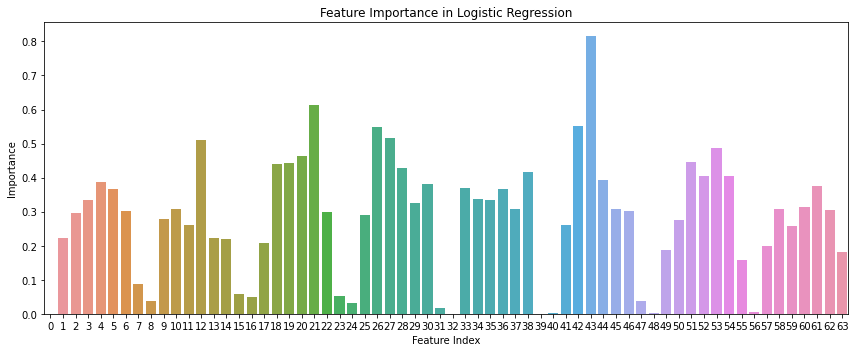


Comparison of Models:
SVM Accuracy: 0.975
Logistic Regression Accuracy: 0.9722222222222222


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True, max_iter=5000)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
logistic_model = LogisticRegression(
    max_iter=5000,
    solver="lbfgs",
    multi_class="auto"
)
logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

print("\nLogistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
feature_importance = np.abs(logistic_model.coef_).mean(axis=0)
plt.figure(figsize=(12, 5))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression")
plt.tight_layout()
plt.show()
print("\nComparison of Models:")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

